# Machine Learning Projects Portofolio
### Ketentuan Tugas :
1. Dibebaskan untuk men-download Dataset dari Kaggle atau sumber data lainnya, pilih untuk kasus supervised atau unsupervised.
2. Buatlah End to end project Machine Learning di local jupyter notebook / Google Collaboratory.
3. Ganti nama file : template_pr_day10.ipynb  dengan PR_day10_nama_siswa.ipynb
4. Upload Dataset yang digunakan ke Kaggle
5. Upload file code dan ppt (jika ada) ke dalam github repository + file readme pada github.
6. Tugas ini bersifat individu, dikumpulkan ke LMS dalam bentuk **link githubnya saja**.

In [1]:
#Import libraries and dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
data = pd.read_csv('garments_worker_productivity.csv')
data

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889


Preprocessing Data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [4]:
data.isnull().sum()

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

Handling Missing Value

In [5]:
data['wip'].fillna(0, inplace=True)

In [6]:
data.isnull().sum()

date                     0
quarter                  0
department               0
day                      0
team                     0
targeted_productivity    0
smv                      0
wip                      0
over_time                0
incentive                0
idle_time                0
idle_men                 0
no_of_style_change       0
no_of_workers            0
actual_productivity      0
dtype: int64

In [7]:
# data['date'] = pd.to_datetime(data['date'])

In [7]:
data.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,687.228070,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1514.582341,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,0.000000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,586.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1083.000000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


In [8]:
data['date'] = pd.to_datetime(data['date'])

In [9]:
data['day'] = data['date'].dt.day_name()
data['month'] = data['date'].dt.month_name() 
# data['year'] = data['date'].dt.year
# data.drop(['date'], axis=1, inplace=True)

In [10]:
columns_names= data.columns
columns_names

Index(['date', 'quarter', 'department', 'day', 'team', 'targeted_productivity',
       'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_style_change', 'no_of_workers', 'actual_productivity', 'month'],
      dtype='object')

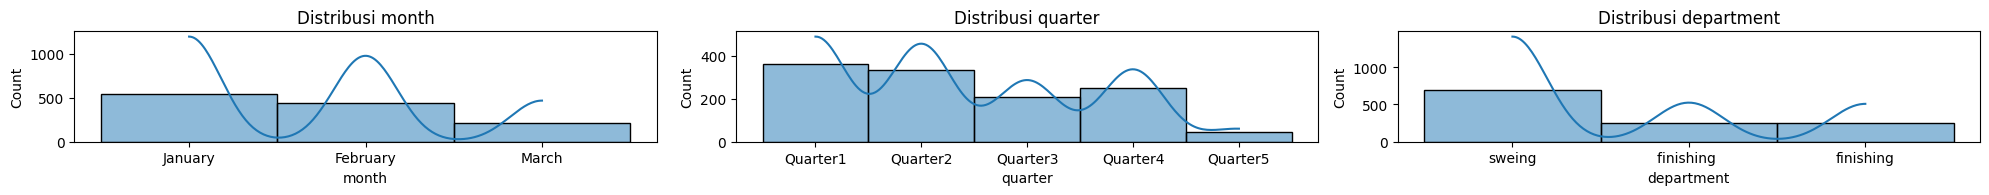

In [11]:
columns_categorical = ['month', 'quarter', 'department']
plt.figure(figsize=(20, 5))
for i, var in enumerate(columns_categorical, 1):
    plt.subplot(3, 3, i)  
    sns.histplot(data[var], kde=True)
    plt.title(f'Distribusi {var}')

plt.tight_layout()
plt.show()

In [12]:
columns_numerical = ['smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_style_change', 'no_of_workers']

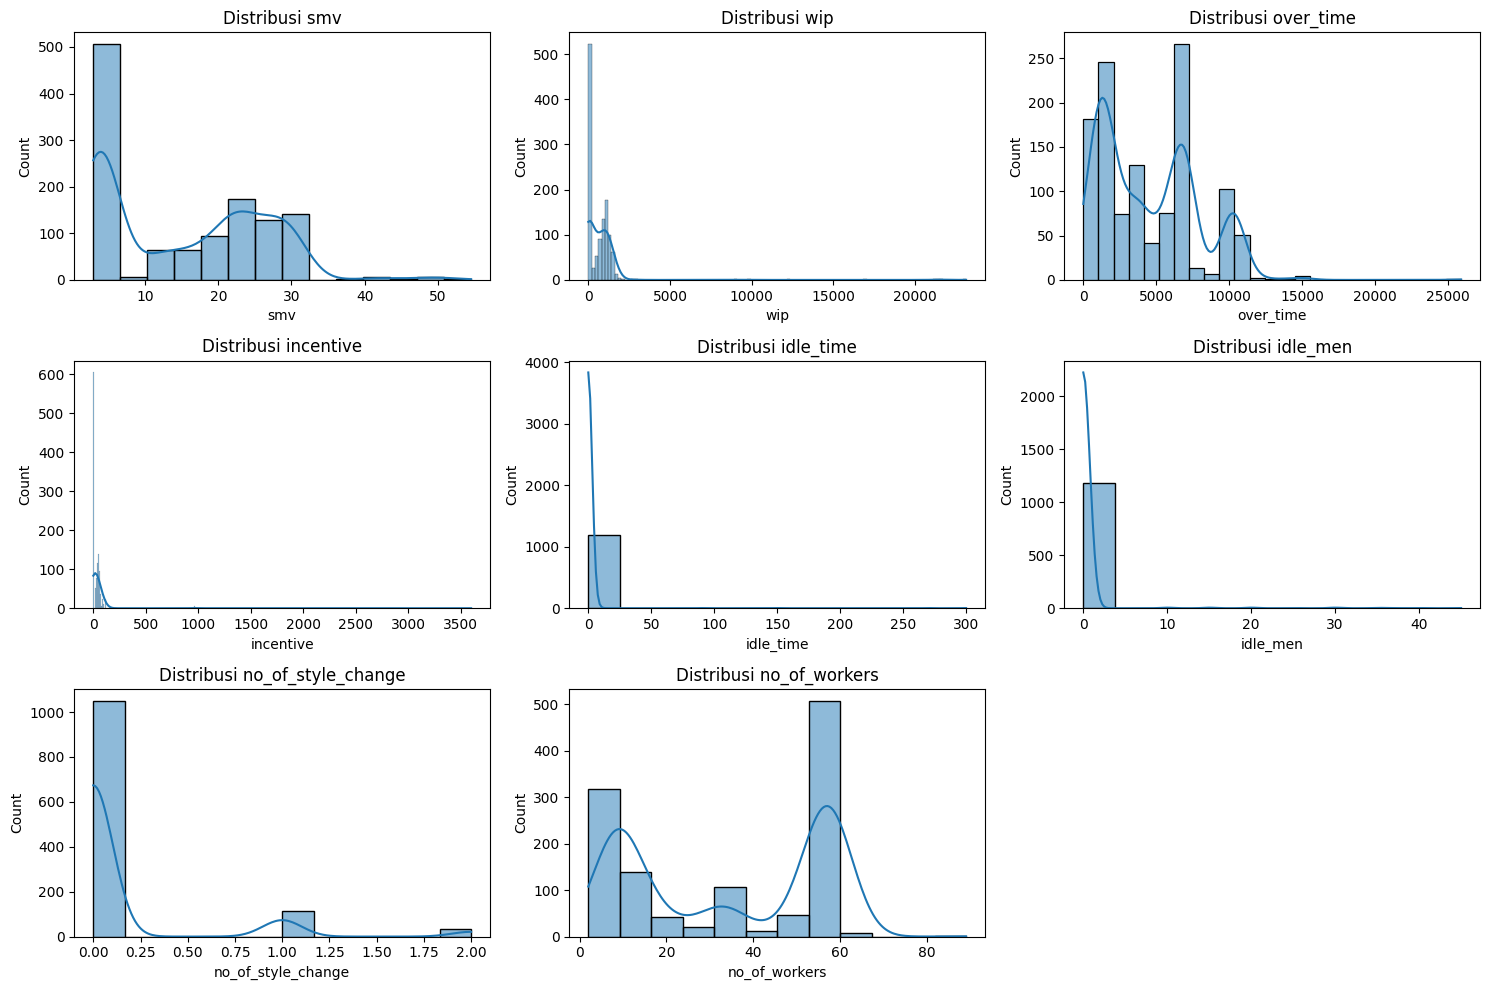

In [13]:
plt.figure(figsize=(15, 10))
for i, var in enumerate(columns_numerical, 1):
    plt.subplot(3, 3, i)  
    sns.histplot(data[var], kde=True)
    plt.title(f'Distribusi {var}')

plt.tight_layout()
plt.show()

In [14]:
data['department'].value_counts()

department
sweing        691
finishing     257
finishing     249
Name: count, dtype: int64

In [16]:
# data.value_counts()

In [15]:
data["department"] = data["department"].apply(lambda x: x.strip())

In [16]:
label_encoder = LabelEncoder()
data['department'] = label_encoder.fit_transform(data['department'])
data['day'] = label_encoder.fit_transform(data['day'])
data['month'] = label_encoder.fit_transform(data['month'])
data['quarter'] = label_encoder.fit_transform(data['quarter'])
data

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,month
0,2015-01-01,0,1,3,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725,1
1,2015-01-01,0,0,3,1,0.75,3.94,0.0,960,0,0.0,0,0,8.0,0.886500,1
2,2015-01-01,0,1,3,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,1
3,2015-01-01,0,1,3,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,1
4,2015-01-01,0,1,3,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,2015-03-11,1,0,5,10,0.75,2.90,0.0,960,0,0.0,0,0,8.0,0.628333,2
1193,2015-03-11,1,0,5,8,0.70,3.90,0.0,960,0,0.0,0,0,8.0,0.625625,2
1194,2015-03-11,1,0,5,7,0.65,3.90,0.0,960,0,0.0,0,0,8.0,0.625625,2
1195,2015-03-11,1,0,5,9,0.75,2.90,0.0,1800,0,0.0,0,0,15.0,0.505889,2


In [17]:
num_subplots = len(columns_names)
num_cols = 3
num_rows = (num_subplots + num_cols - 1) // num_cols

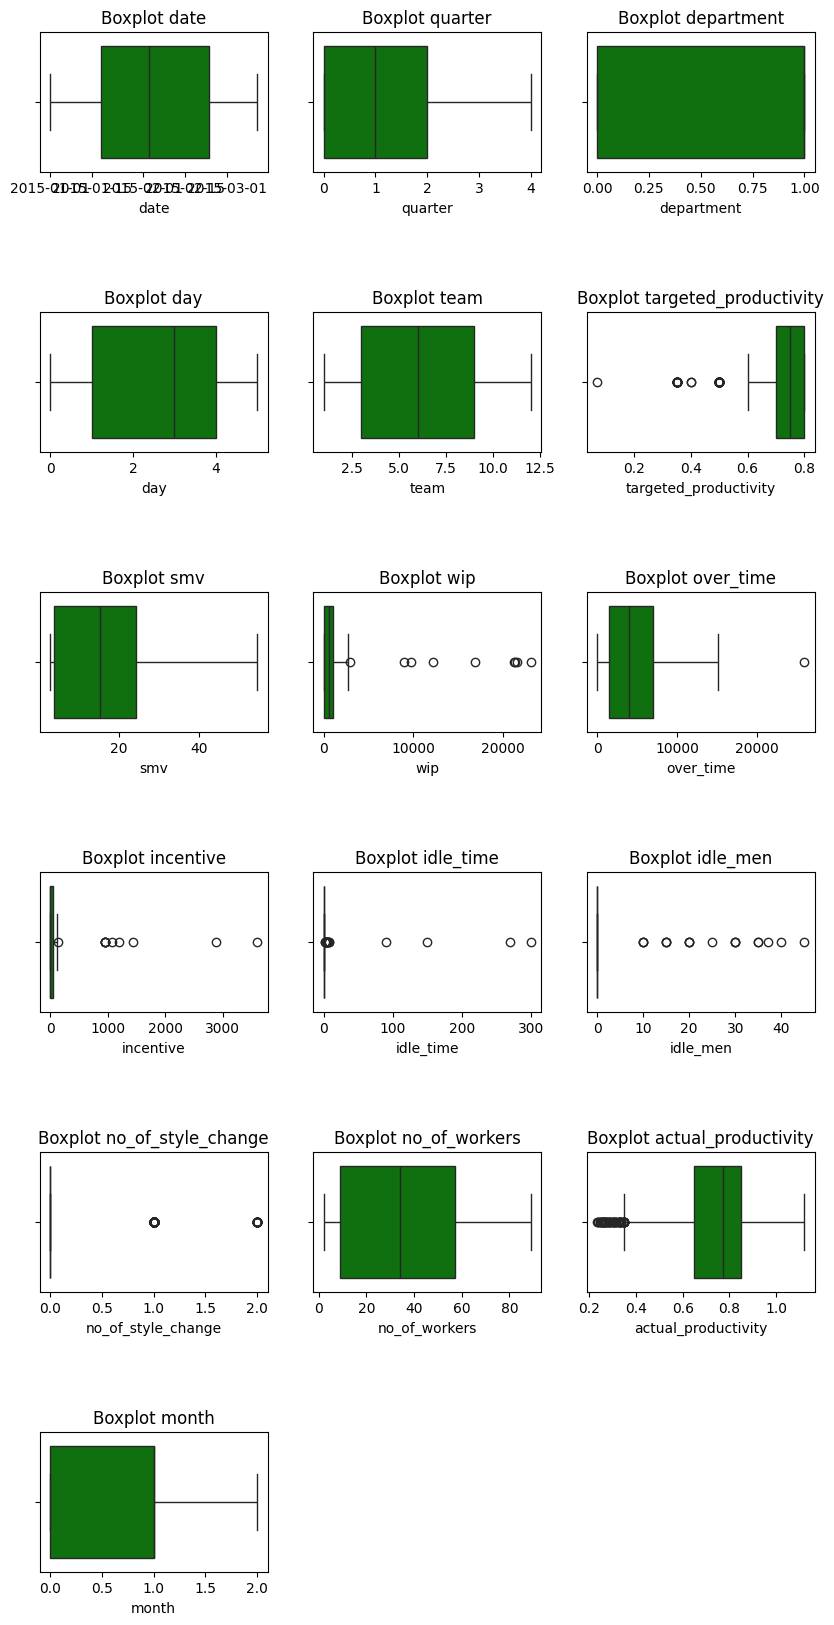

In [18]:
plt.figure(figsize=(10, 20))
for i, kolom in enumerate(columns_names, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(x=data[kolom], color='green')
    plt.title(f'Boxplot {kolom}')
    plt.xlabel(kolom)

plt.subplots_adjust(hspace=1, wspace=0.2)
plt.show()

In [59]:
def find_outlier_boundary(df, variable):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * 1.5)
    upper_boundary = df[variable].quantile(0.75) + (IQR * 1.5)

    return upper_boundary, lower_boundary

In [61]:
for column in columns_names:
    upper_limit, lower_limit = find_outlier_boundary(data, kolom)
    print(f'==== {kolom} ====')
    print(f'nilai batas atas dari {kolom} : ',upper_limit)
    print(f'nilai batas bawah dari {kolom} : ',lower_limit)
    # Mengganti nilai outlier dengan batas atas dan batas bawah
    data[kolom] = np.where(data[kolom] > upper_limit, upper_limit,
                                    np.where(data[kolom] < lower_limit, lower_limit, data[kolom]))

==== month ====
nilai batas atas dari month :  2.5
nilai batas bawah dari month :  -1.5
==== month ====
nilai batas atas dari month :  2.5
nilai batas bawah dari month :  -1.5
==== month ====
nilai batas atas dari month :  2.5
nilai batas bawah dari month :  -1.5
==== month ====
nilai batas atas dari month :  2.5
nilai batas bawah dari month :  -1.5
==== month ====
nilai batas atas dari month :  2.5
nilai batas bawah dari month :  -1.5
==== month ====
nilai batas atas dari month :  2.5
nilai batas bawah dari month :  -1.5
==== month ====
nilai batas atas dari month :  2.5
nilai batas bawah dari month :  -1.5
==== month ====
nilai batas atas dari month :  2.5
nilai batas bawah dari month :  -1.5
==== month ====
nilai batas atas dari month :  2.5
nilai batas bawah dari month :  -1.5
==== month ====
nilai batas atas dari month :  2.5
nilai batas bawah dari month :  -1.5
==== month ====
nilai batas atas dari month :  2.5
nilai batas bawah dari month :  -1.5
==== month ====
nilai batas atas

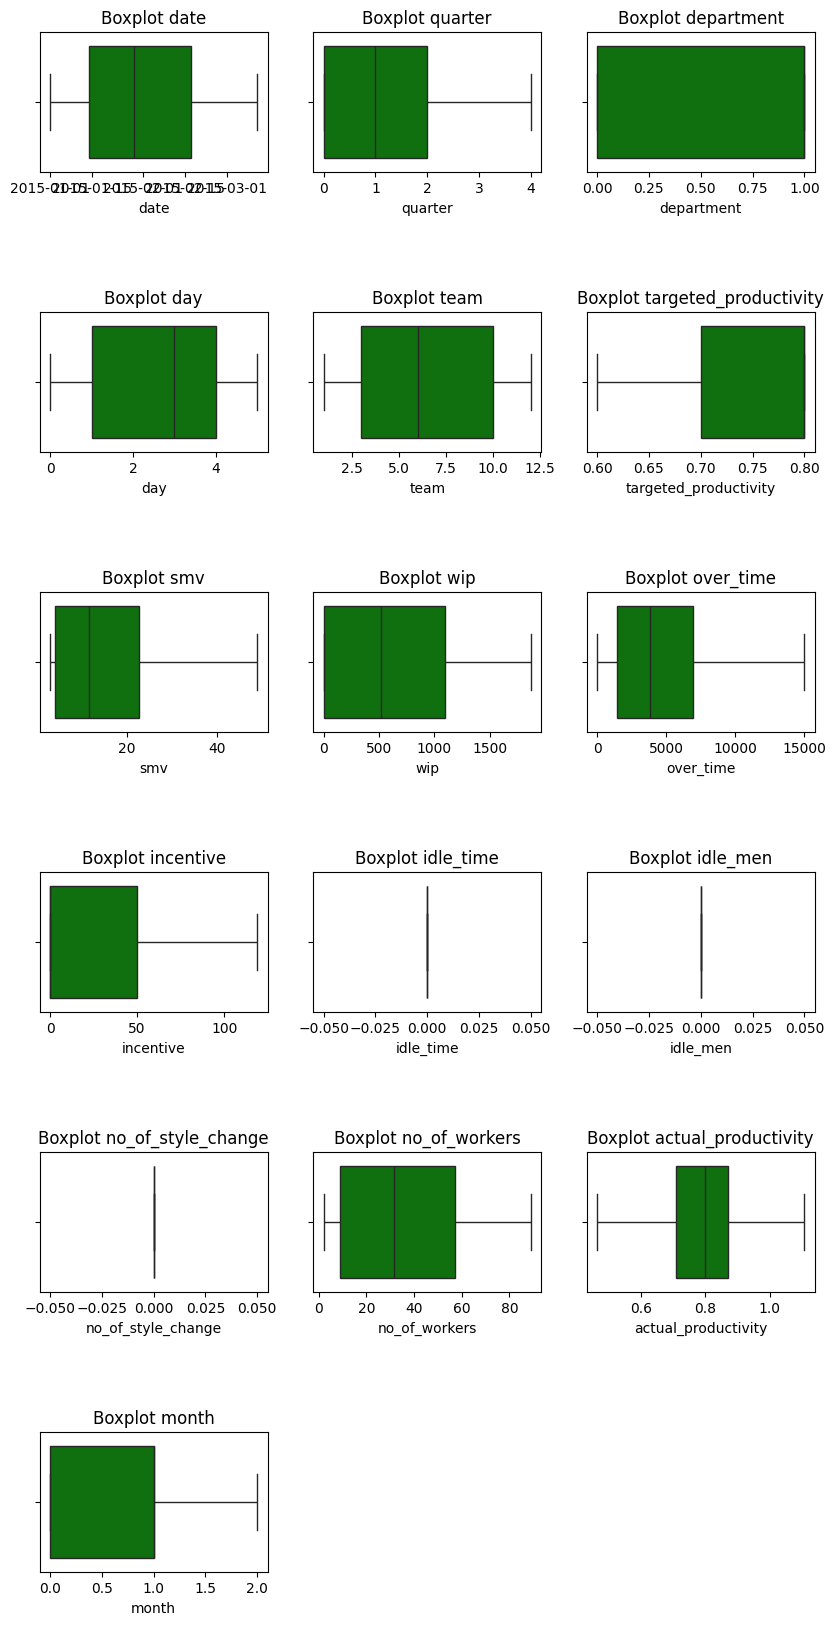

In [62]:
plt.figure(figsize=(10, 20))
for i, kolom in enumerate(columns_names, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(x=data[kolom], color='green')
    plt.title(f'Boxplot {kolom}')
    plt.xlabel(kolom)

plt.subplots_adjust(hspace=1, wspace=0.2)
plt.show()

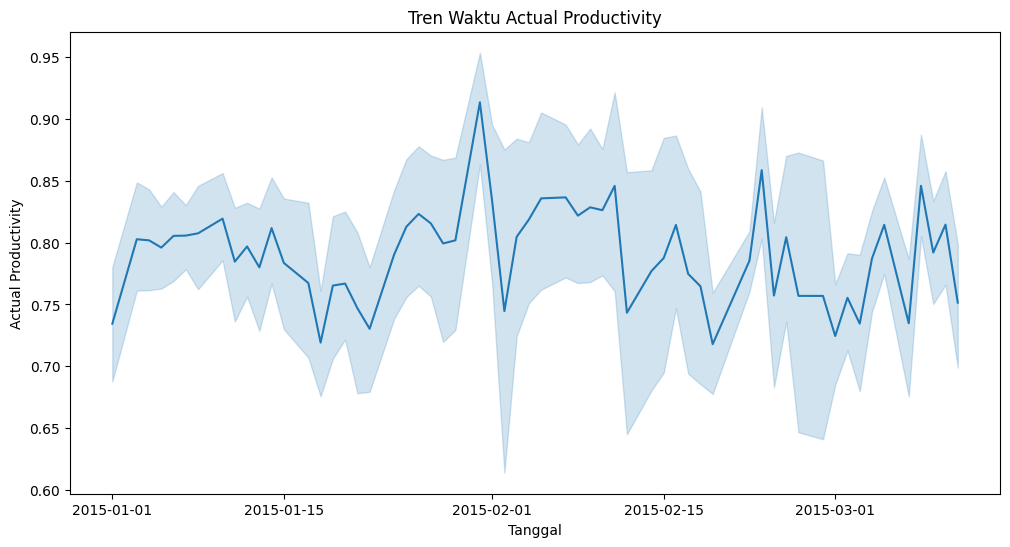

In [39]:
data['date'] = pd.to_datetime(data['date'])
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='actual_productivity', data=data)

plt.xlabel('Tanggal')
plt.ylabel('Actual Productivity')
plt.title('Tren Waktu Actual Productivity')

plt.show()

In [63]:
numeric_data = data.select_dtypes(include=['float64', 'int64'])
matrix = numeric_data.corr()
(matrix)

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,month
team,1.000000,0.032925,-0.081650,0.002350,-0.105601,-0.059004,NaN,NaN,NaN,-0.077653,-0.186720,-0.006473
targeted_productivity,0.032925,1.000000,-0.026970,-0.045766,-0.084820,0.162517,NaN,NaN,NaN,-0.043769,0.330133,-0.157465
smv,-0.081650,-0.026970,1.000000,0.805670,0.745500,0.736600,NaN,NaN,NaN,0.929744,-0.081481,0.054983
wip,0.002350,-0.045766,0.805670,1.000000,0.685256,0.827885,NaN,NaN,NaN,0.861910,-0.016181,0.038580
over_time,-0.105601,-0.084820,0.745500,0.685256,1.000000,0.611085,NaN,NaN,NaN,0.787927,-0.064729,0.142743
incentive,-0.059004,0.162517,0.736600,0.827885,0.611085,1.000000,NaN,NaN,NaN,0.804768,0.211043,-0.004375
idle_time,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
idle_men,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
no_of_style_change,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
no_of_workers,-0.077653,-0.043769,0.929744,0.861910,0.787927,0.804768,NaN,NaN,NaN,1.000000,-0.028534,0.067178


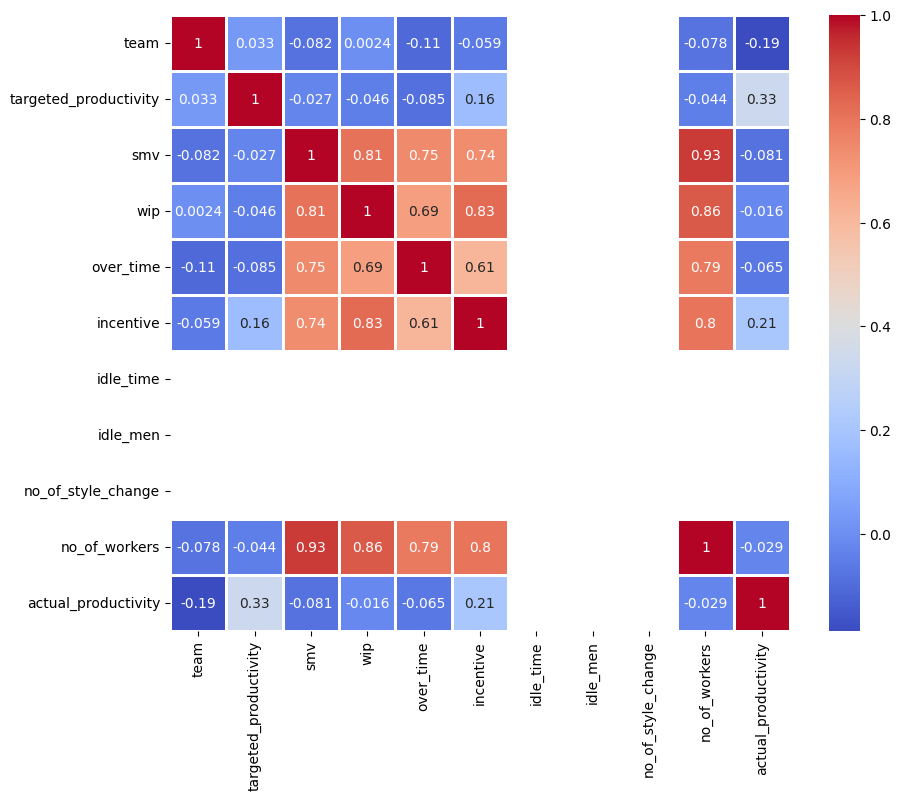

In [41]:
plt.figure(figsize=(10,8))
ax = sns.heatmap(numeric_data.corr(), cmap = "coolwarm", annot=True, linewidth=2)

In [42]:
X = data.drop([ 'date' ,'actual_productivity'], axis = 1)
X

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,month
0,0,1,3,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,1
1,0,0,3,1,0.75,3.94,0.0,960,0,0.0,0,0,8.0,1
2,0,1,3,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,1
3,0,1,3,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,1
4,0,1,3,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1187,1,1,5,4,0.75,26.82,1054.0,7080,45,0.0,0,0,59.0,2
1192,1,0,5,10,0.75,2.90,0.0,960,0,0.0,0,0,8.0,2
1193,1,0,5,8,0.70,3.90,0.0,960,0,0.0,0,0,8.0,2
1194,1,0,5,7,0.65,3.90,0.0,960,0,0.0,0,0,8.0,2


In [43]:
y = data['actual_productivity']
y

0       0.940725
1       0.886500
2       0.800570
3       0.800570
4       0.800382
          ...   
1187    0.750051
1192    0.628333
1193    0.625625
1194    0.625625
1195    0.505889
Name: actual_productivity, Length: 888, dtype: float64

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [45]:
# y_test.shape

In [46]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [47]:
svr = SVR()
svr.fit(X_train_scaled, y_train)
y_pred = svr.predict(X_test_scaled)

In [48]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

In [49]:
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R2): {r2}')

Mean Absolute Error (MAE): 0.07434677002880657
Mean Squared Error (MSE): 0.010187069129322822
Root Mean Squared Error (RMSE): 0.10093101173238492
R-squared (R2): 0.3136049750143891


In [50]:
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

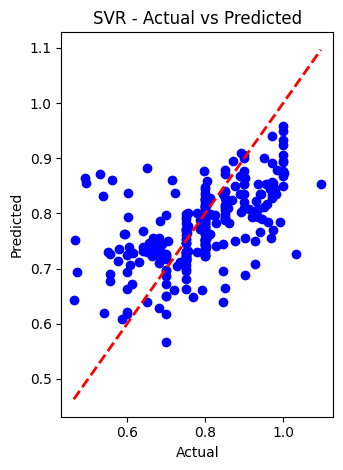

In [51]:
# Scatter plot nilai aktual vs. nilai prediksi
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('SVR - Actual vs Predicted')

plt.tight_layout()
plt.show()

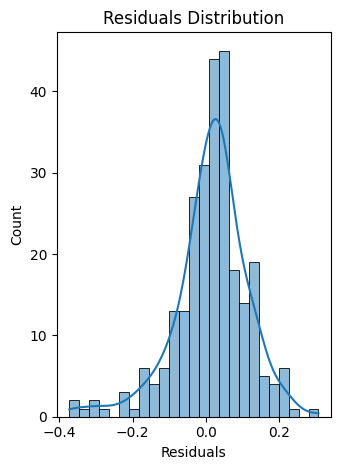

In [52]:
# Histogram residual (selisih antara nilai aktual dan nilai prediksi)
plt.subplot(1, 2, 2)
residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')

plt.tight_layout()
plt.show()